Pearson correlation coefficient (causality measure): 0.8370861280681665


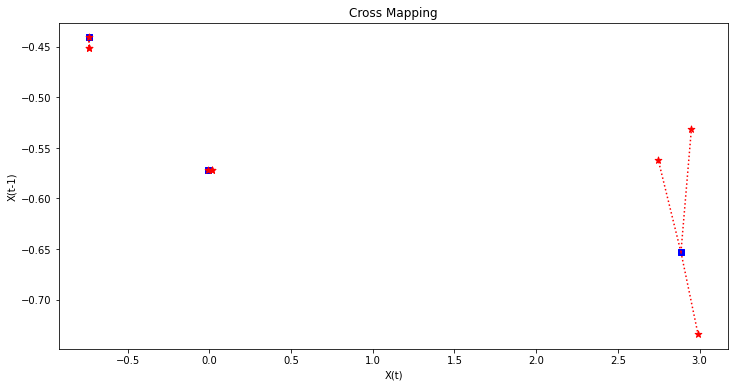

In [5]:
# Import necessary modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from ConvergentCrossMapping import CCM  # Ensure the class is imported correctly

# Load the data
file_path = "C:/Users/kragg/OneDrive/Documents/Code/Data/uber.csv"
uber_data = pd.read_csv(file_path)

# Preprocess the data
# Convert pickup_datetime to datetime object
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])

# Scale the relevant features
scaler = StandardScaler()
uber_data[['fare_amount', 'distance_km', 'time_of_day', 'hour_of_day']] = scaler.fit_transform(
    uber_data[['fare_amount', 'distance_km', 'time_of_day', 'hour_of_day']])

# Sampling
uber_data_sampled = uber_data.sample(n=5000, random_state=1)  # Sample 5000 rows

# Extract the variables for CCM
X = uber_data_sampled['distance_km'].values
Y = uber_data_sampled['fare_amount'].values

# Applying CCM to the Uber data
ccm = CCM(X, Y, tau=1, E=2, L=len(X))
r = ccm.causality()
print(f'Pearson correlation coefficient (causality measure): {r}')

ccm.visualize_cross_mapping()
